# Atliqo Telecom Project



In [2]:
import pandas as pd

Loading table "dim_cities" to dataframe...

In [3]:
dim_cities = pd.read_csv("C:\\Users\\m9wrc\\OneDrive\\Desktop\\Telecom Project AtliQ\\Imp\\dim_cities.csv") 
dim_cities

city_code   city_name
0      400001      Mumbai
1      110001       Delhi
2      700001     Kolkata
3      560001   Bangalore
4      600001     Chennai
5      500001   Hyderabad
6      411001        Pune
7      380001   Ahmedabad
8      302001      Jaipur
9      226001     Lucknow
10     800008       Patna
11     641001  Coimbatore
12     160017  Chandigarh
13     122001     Gurgaon
14     492001      Raipur

Loading table "dim_date" to dataframe...

In [4]:
dim_date = pd.read_csv("C:\\Users\\m9wrc\\OneDrive\\Desktop\\Telecom Project AtliQ\\Imp\\dim_date.csv")
dim_date

date month_name before/after_5g  time_period
0  01-Jan-22        Jan       Before 5G            1
1  01-Feb-22        Feb       Before 5G            2
2  01-Mar-22        Mar       Before 5G            3
3  01-Apr-22        Apr       Before 5G            4
4  01-Jun-22        Jun        After 5G            1
5  01-Jul-22        Jul        After 5G            2
6  01-Aug-22        Aug        After 5G            3
7  01-Sep-22        Sep        After 5G            4

Changing Index to Date field

In [5]:
dim_date.set_index("date")

month_name before/after_5g  time_period
date                                             
01-Jan-22        Jan       Before 5G            1
01-Feb-22        Feb       Before 5G            2
01-Mar-22        Mar       Before 5G            3
01-Apr-22        Apr       Before 5G            4
01-Jun-22        Jun        After 5G            1
01-Jul-22        Jul        After 5G            2
01-Aug-22        Aug        After 5G            3
01-Sep-22        Sep        After 5G            4

In [6]:
dim_date.date.describe()

count             8
unique            8
top       01-Jan-22
freq              1
Name: date, dtype: object

Changing Type of "date" to datetime

In [7]:
from datetime import datetime
dim_date["date"] = pd.to_datetime(dim_date["date"])

In [8]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8 non-null      datetime64[ns]
 1   month_name       8 non-null      object        
 2   before/after_5g  8 non-null      object        
 3   time_period      8 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 384.0+ bytes


Loading table "dim_plan" to dataframe...

In [9]:
dim_plan = pd.read_csv("C:\\Users\\m9wrc\\OneDrive\\Desktop\\Telecom Project AtliQ\\Imp\\dim_plan.csv")
dim_plan

plan                                   plan_description
0    p1  Smart Recharge Pack (2 GB / Day Combo For 3 mo...
1    p2  Super Saviour Pack (1.5 GB / Day Combo For 56 ...
2    p3        Elite saver Pack (1 GB/ Day) Valid: 28 Days
3    p4  Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days
4    p5                    Rs. 99 Full Talktime Combo Pack
5    p6      Xstream Mobile Data Pack: 15GB Data | 28 days
6    p7                      25 GB Combo 3G / 4G Data Pack
7    p8         Daily Saviour (1 GB / Day) validity: 1 Day
8    p9        Combo TopUp: 14.95 Talktime and 300 MB data
9   p10       Big Combo Pack (6 GB / Day) validity: 3 Days
10  p11  Ultra Fast Mega Pack (3GB / Day Combo For 80 d...
11  p12  Ultra Duo Data Pack (1.8GB / Day Combo For 55 ...
12  p13     Mini Ultra Saver Pack (750 MB/Day for 28 Days)

Loading Fact Tables into Database

In [10]:
fact_atliqo_metrics = pd.read_csv("C:\\Users\\m9wrc\\OneDrive\\Desktop\\Telecom Project AtliQ\\Imp\\fact_atliqo_metrics.csv")
fact_market_share = pd.read_csv("C:\\Users\\m9wrc\\OneDrive\\Desktop\\Telecom Project AtliQ\\Imp\\fact_market_share.csv")
fact_plan_revenue = pd.read_csv("C:\\Users\\m9wrc\\OneDrive\\Desktop\\Telecom Project AtliQ\\Imp\\fact_plan_revenue.csv")

In [11]:
fact_atliqo_metrics.head(5)

date  city_code company  atliqo_revenue_crores  arpu  \
0  01-Jan-22     400001  Atliqo                  60.69   192   
1  01-Jan-22     110001  Atliqo                  42.71   175   
2  01-Jan-22     700001  Atliqo                  36.91   175   
3  01-Jan-22     560001  Atliqo                  37.40   175   
4  01-Jan-22     600001  Atliqo                  30.80   203   

   active_users_lakhs  unsubscribed_users_lakhs  
0               31.61                      1.90  
1               24.41                      1.31  
2               21.09                      1.25  
3               21.37                      1.39  
4               15.17                      1.12

In [12]:
fact_market_share.head(5)

date  city_code  tmv_city_crores company  ms_pct
0  01-Jan-22     400001           286.29  Atliqo   21.20
1  01-Jan-22     110001           241.59  Atliqo   17.68
2  01-Jan-22     700001           222.19  Atliqo   16.61
3  01-Jan-22     560001           195.41  Atliqo   19.14
4  01-Jan-22     600001           166.78  Atliqo   18.47

In [13]:
fact_plan_revenue.head(5)

date  city_code plans  plan_revenue_crores
0  01-Jan-22     400001    p1                 6.26
1  01-Jan-22     110001    p1                 4.58
2  01-Jan-22     700001    p1                 4.29
3  01-Jan-22     560001    p1                 4.26
4  01-Jan-22     600001    p1                 3.60

Checking Na Values

In [14]:
fact_atliqo_metrics.isnull().sum()

date                        0
city_code                   0
company                     0
atliqo_revenue_crores       0
arpu                        0
active_users_lakhs          0
unsubscribed_users_lakhs    0
dtype: int64

In [15]:
fact_market_share.isnull().sum()

date               0
city_code          0
tmv_city_crores    0
company            0
ms_pct             0
dtype: int64

In [16]:
fact_plan_revenue.isnull().sum()

date                   0
city_code              0
plans                  0
plan_revenue_crores    0
dtype: int64

Changing "date" type in fact tables

In [17]:
fact_atliqo_metrics["date"] = pd.to_datetime(fact_atliqo_metrics["date"])
fact_market_share["date"] = pd.to_datetime(fact_atliqo_metrics["date"])
fact_plan_revenue["date"] = pd.to_datetime(fact_atliqo_metrics["date"])

In [18]:
fact_atliqo_metrics.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 120 entries, 0 to 119
Series name: date
Non-Null Count  Dtype         
--------------  -----         
120 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 KB


In [19]:
fact_market_share.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 600 entries, 0 to 599
Series name: date
Non-Null Count  Dtype         
--------------  -----         
120 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.8 KB


In [20]:
fact_plan_revenue.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1200 entries, 0 to 1199
Series name: date
Non-Null Count  Dtype         
--------------  -----         
120 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.5 KB


Merge "dim_cities" with "fact_atliqo_metrics"

In [21]:
df_cities_atliqo_metrics = pd.merge(dim_cities, fact_atliqo_metrics, on = "city_code", how = "right")

In [22]:
df_cities_atliqo_metrics

city_code   city_name       date company  atliqo_revenue_crores  arpu  \
0       400001      Mumbai 2022-01-01  Atliqo                  60.69   192   
1       110001       Delhi 2022-01-01  Atliqo                  42.71   175   
2       700001     Kolkata 2022-01-01  Atliqo                  36.91   175   
3       560001   Bangalore 2022-01-01  Atliqo                  37.40   175   
4       600001     Chennai 2022-01-01  Atliqo                  30.80   203   
..         ...         ...        ...     ...                    ...   ...   
115     800008       Patna 2022-09-01  Atliqo                  11.86   250   
116     641001  Coimbatore 2022-09-01  Atliqo                   8.59   177   
117     160017  Chandigarh 2022-09-01  Atliqo                  10.32   163   
118     122001     Gurgaon 2022-09-01  Atliqo                   6.35   238   
119     492001      Raipur 2022-09-01  Atliqo                   3.73   173   

     active_users_lakhs  unsubscribed_users_lakhs  
0                 31.61                      1.90  
1                 24.41                      1.31  
2                 21.09                      1.25  
3                 21.37                      1.39  
4                 15.17                      1.12  
..                  ...                       ...  
115                4.74                      0.38  
116                4.85                      0.53  
117                6.33                      0.63  
118                2.67                      0.21  
119                2.16                      0.18  

[120 rows x 8 columns]

Atliqo Revenue By City

<Axes: ylabel='city_name'>

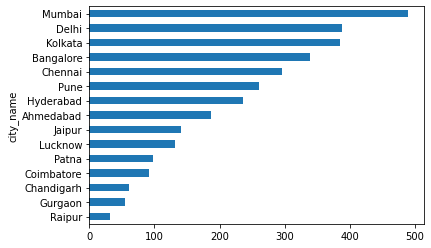

In [23]:
df_cities_atliqo_metrics.groupby("city_name")["atliqo_revenue_crores"].sum().sort_values().plot(kind = "barh")

ARPU By City

<Axes: xlabel='city_name'>

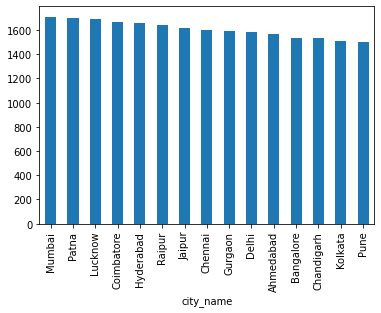

In [24]:
df_cities_atliqo_metrics.groupby("city_name")["arpu"].sum().sort_values(ascending = False).plot(kind = "bar")

<Axes: xlabel='city_name'>

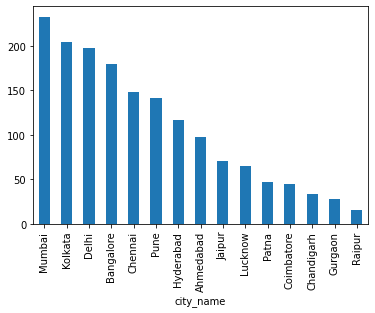

In [25]:
df_cities_atliqo_metrics.groupby("city_name")["active_users_lakhs"].sum().sort_values(ascending = False).plot(kind = "bar")

<Axes: xlabel='city_name'>

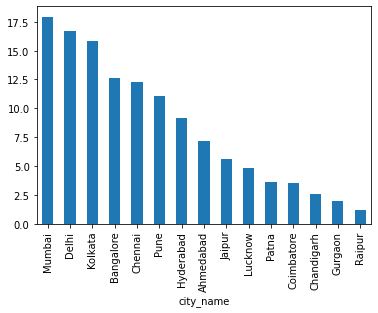

In [26]:
df_cities_atliqo_metrics.groupby("city_name")["unsubscribed_users_lakhs"].sum().sort_values(ascending = False).plot(kind = "bar")

Merge "dim_date" with "fact_atliqo_metrics"

In [27]:
df_date_atliqo_metrics = pd.merge(dim_date, fact_atliqo_metrics, on = "date")

In [51]:
df_date_atliqo_metrics

date month_name before/after_5g  time_period  city_code company  \
0   2022-01-01        Jan       Before 5G            1     400001  Atliqo   
1   2022-01-01        Jan       Before 5G            1     110001  Atliqo   
2   2022-01-01        Jan       Before 5G            1     700001  Atliqo   
3   2022-01-01        Jan       Before 5G            1     560001  Atliqo   
4   2022-01-01        Jan       Before 5G            1     600001  Atliqo   
..         ...        ...             ...          ...        ...     ...   
115 2022-09-01        Sep        After 5G            4     800008  Atliqo   
116 2022-09-01        Sep        After 5G            4     641001  Atliqo   
117 2022-09-01        Sep        After 5G            4     160017  Atliqo   
118 2022-09-01        Sep        After 5G            4     122001  Atliqo   
119 2022-09-01        Sep        After 5G            4     492001  Atliqo   

     atliqo_revenue_crores  arpu  active_users_lakhs  unsubscribed_users_lakhs  
0                    60.69   192               31.61                      1.90  
1                    42.71   175               24.41                      1.31  
2                    36.91   175               21.09                      1.25  
3                    37.40   175               21.37                      1.39  
4                    30.80   203               15.17                      1.12  
..                     ...   ...                 ...                       ...  
115                  11.86   250                4.74                      0.38  
116                   8.59   177                4.85                      0.53  
117                  10.32   163                6.33                      0.63  
118                   6.35   238                2.67                      0.21  
119                   3.73   173                2.16                      0.18  

[120 rows x 10 columns]

<Axes: xlabel='month_name'>

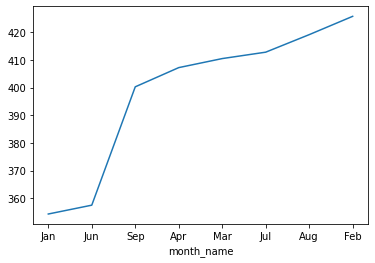

In [54]:
df_date_atliqo_metrics.groupby("month_name")["atliqo_revenue_crores"].sum().sort_values().plot()

<Axes: xlabel='month_name'>

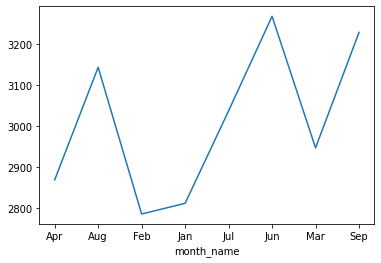

In [57]:
df_date_atliqo_metrics.groupby("month_name")["arpu"].sum().plot()

<Axes: xlabel='month_name'>

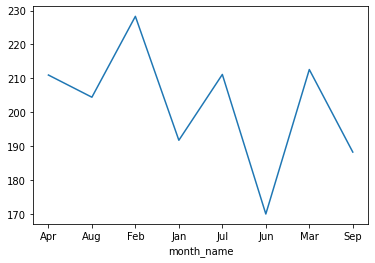

In [58]:
df_date_atliqo_metrics.groupby("month_name")["active_users_lakhs"].sum().plot()

<Axes: xlabel='month_name'>

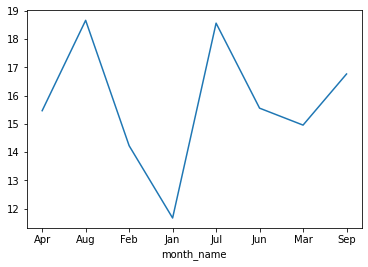

In [59]:
df_date_atliqo_metrics.groupby("month_name")["unsubscribed_users_lakhs"].sum().plot()